Dane liczby zachorowań w Polsce, liczba ludności, estymacja parametru A w modelu Kermacka–McKendricka na podstawie średniego czasu inkubacji SARS-CoV-2

In [20]:
import numpy as np
dni = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
zachorowania = np.array([1, 0, 4, 0, 6, 5, 6, 9, 18, 19, 35, 16, 58, 61, 13, 104, 70, 111, 98])
total = np.cumsum(zachorowania)

print(len(zachorowania), total)
data_len = len(zachorowania)
ludnosc = 37717326
sr_okres_inkubacji = 5.2
A = 1 / sr_okres_inkubacji

19 [  1   1   5   5  11  16  22  31  49  68 103 119 177 238 251 355 425 536
 634]


Predykcja liczby chorych modelem Kermacka–McKendricka

In [21]:
def predict(A, B, S, I, R, n):
    s = np.zeros(n)
    r = np.zeros(n)
    i = np.zeros(n)
    s[0] = S
    i[0] = I
    r[0] = R
    for j in range(1, n):
        s[j] = s[j - 1] - B * i[j - 1] * s[j - 1]
        i[j] = i[j - 1] + B * i[j - 1] * s[j - 1] - A * i[j - 1]
        r[j] = r[j - 1] + A * i[j - 1]
    return i

Estymacja parametru B modelu za pomocą metody najmniejszych kwadratów

In [22]:
from scipy.optimize import leastsq

def to_min(B):
    return predict(A, B, ludnosc, 1, 0, data_len) - total

B = leastsq(to_min, 1e-8)[0].item(0)
print(B)

1.687308387486413e-08


Predykcja rozwoju wirusa przez 80 dni od pierwszego przypadku:

In [23]:
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

numdays = 80
preds = predict(A, B, ludnosc, 1, 0, numdays)

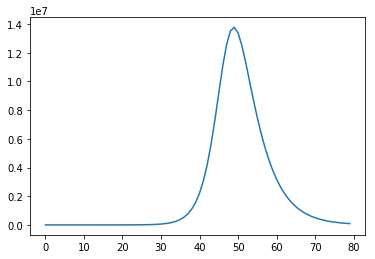

In [24]:
plt.plot([i for i in range(numdays)], preds)

plt.show()

Jak widać tak prosty model (mam nadzieję) nie modeluje zbyt dobrze ogólnokrajowej epidemii - jest w nim zbyt mało parametrów, a danych jest zbyt mało...